# Results and Models

This page provides an overview of Result objects with a view to key interactions and access to model outputs. 

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import atomica as at
import numpy as np
import matplotlib.pyplot as plt

First we will run a simulation to produce a `Result` object.

In [2]:
P = at.demo('tb')
result = P.results[0]

Elapsed time for running "default": 0.673s


The plotting documentation discusses how to generate plots in detail. This documentation will thus focus on methods and functionality of the `Result` object itself, with a view to 

1. Generating pre-specified plots
2. Accessing and interacting with raw values

## Pre-specified plots

It is possible to pre-define plots in the Framework by creating a sheet called 'Plots'. This sheet contains a specification of a set of plots to generate:

In [3]:
P.framework.sheets['plots'][0]

,name,type,quantities,plot group
1,Population size,series,alive,Demographics
2,Latent infections,series,lt_inf,TB progression
3,Active TB,series,ac_inf,TB progression
4,Active DS-TB,series,ds_inf,TB smear/strain
5,Active MDR-TB,series,mdr_inf,TB smear/strain
6,Active XDR-TB,series,xdr_inf,TB smear/strain
7,New active TB infections,series,"{'New incident cases':['leu_act:flow','llu_act...",TB progression
8,Activated TB infections inc. relapse and immig...,series,"{'Incident cases':['p_div:flow','n_div:flow']}",TB smear/strain
9,Smear negative active TB,series,sn_inf,TB smear/strain
10,Smear positive active TB,series,sp_inf,TB smear/strain


The most important columns here are the `name` which identifies the plot, and the `quantities` which corresponds to a valid input to the `outputs` argument of `PlotData`. To generate a plot, simply pass the name of the plot to `Result.plot`:

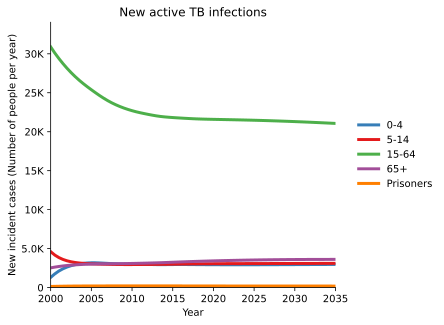

In [4]:
result.plot('New active TB infections');

The output is the same as if a `PlotData` object was constructed, a series plot generated with `axis='pops'`, and the title set to match the specified title:

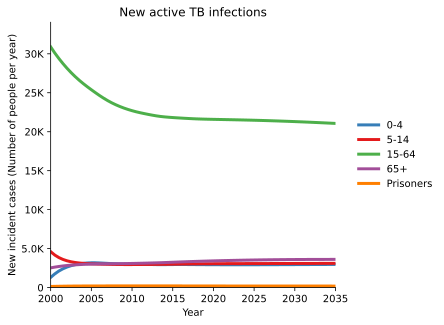

In [5]:
d = at.PlotData(result,outputs={'New incident cases':['leu_act:flow','llu_act:flow', 'lex_act:flow', 'llx_act:flow', ]})
at.plot_series(d,axis='pops');
plt.title('New active TB infections');

Calling `Result.plot()` with no arguments will result in all plots in the Framework being produced. At the moment, it is only possible to define series plots in the framework.

## Exporting results

Many key outputs are generated by aggregation of raw model quantities - for example, in the demo TB model, the number of new cases is given by aggregating together several different modes of latent activation. Thus, often the main quantities for analysis are those defined as plottable quantities on the Framework's 'Plots' sheet. 

These outputs can be written to an Excel file using the `at.export_results()` function. This is not a method of the `Result` because it is possible to export multiple results at the same time, which is shown later in this document. 

In [6]:
at.export_results(result,'example1.xlsx');

WARNING {plotting.py:1186} - Series(parset_default,total,im_lat_div) contains NaNs


WARNING {plotting.py:1186} - Series(parset_default,total,im_act_div) contains NaNs


This produces a spreadsheet like the one shown below:

![resultsexport1](assets/results_export1.jpg)

Additional sheets will be present showing with numerical values for any cascades that are present:

![resultsexport1cascades](assets/results_export1_cascades.jpg)

If any parameters are targetable by programs, the exported results will also include the value of those parameters, which facilitates monitoring program overwrites. 

![resultsexport1targets](assets/results_export1_targets.jpg)

If programs are present, an additional sheet will be written with program-related outputs. To demonstrate this, we will now first generate some scenario results:

In [7]:
at.make_demo_scenarios(P)
scen_results = P.run_scenarios()
at.export_results(scen_results[0],'example2.xlsx');

Elapsed time for running "default": 0.862s


Elapsed time for running "default": 1.05s


Elapsed time for running "default": 0.818s


WARNING {plotting.py:1186} - Series(Default budget,total,im_lat_div) contains NaNs


WARNING {plotting.py:1186} - Series(Default budget,total,im_act_div) contains NaNs


We have now exported results for a single simulation with programs active. The exported spreadsheet now contains a 'Programs' sheet with contents like:

![resultsexport2programs](assets/results_export2_programs.jpg)

We next turn to the question of exporting multiple results. The scenario set that we ran above produced 3 results. We can write all three to a workbook by passing all of them to `at.export_results`

In [8]:
at.export_results(scen_results,'example3.xlsx');

WARNING {plotting.py:1186} - Series(Zero budget,total,ac_diag_rate) contains NaNs


WARNING {plotting.py:1186} - Series(Default budget,total,im_lat_div) contains NaNs


WARNING {plotting.py:1186} - Series(Doubled budget,total,im_lat_div) contains NaNs


WARNING {plotting.py:1186} - Series(Zero budget,total,im_lat_div) contains NaNs


WARNING {plotting.py:1186} - Series(Default budget,total,im_act_div) contains NaNs


WARNING {plotting.py:1186} - Series(Doubled budget,total,im_act_div) contains NaNs


WARNING {plotting.py:1186} - Series(Zero budget,total,im_act_div) contains NaNs


This produces a workbook where all of the results are displayed together. For example, the original 'Plot data' sheet now shows:

![resultsexport3plotdata](assets/results_export3_plotdata.jpg)

with similar changes to the other sheets as well.

By default, the results are shown with each quantity (e.g. parameter, program) being in a separate table, that is grouped by result, then by population. So in the screenshot above, the table is for the 'Population size' quantity, on the left there are blocks for the 'Default budget' scenario, the 'Doubled budget' scenario etc. and then within each block, the population are shown. 

Sometimes it is useful to group the quantities differently. For example, if we wanted to compare the number of people in each of the populations under each scenario. To do this, simply specify a different grouping order. The default grouping order described and shown above is `('output','result','pop')`. If we wanted to place all of the same populations together, specify the order as `('output','pop','result')` instead.

In [9]:
at.export_results(scen_results,'example4.xlsx',output_ordering=('output','pop','result'));

WARNING {plotting.py:1186} - Series(Zero budget,total,ac_diag_rate) contains NaNs


WARNING {plotting.py:1186} - Series(Default budget,total,im_lat_div) contains NaNs


WARNING {plotting.py:1186} - Series(Doubled budget,total,im_lat_div) contains NaNs


WARNING {plotting.py:1186} - Series(Zero budget,total,im_lat_div) contains NaNs


WARNING {plotting.py:1186} - Series(Default budget,total,im_act_div) contains NaNs


WARNING {plotting.py:1186} - Series(Doubled budget,total,im_act_div) contains NaNs


WARNING {plotting.py:1186} - Series(Zero budget,total,im_act_div) contains NaNs


This produces the following output

![resultsexport4plotdata](assets/results_export4_plotdata.jpg)

Notice how the values are grouped differently now. The ordering is specified independently for the plot data, cascades, and programs - see the documentation for the `export_results` function for full details. 

Finally, note that it was only necessary to pass a list of results to `at.export_results` - this means that it is possible to combine arbitrary results into a single spreadsheet as required (they do not all have to come from the same set of scenarios or optimization). 

## Exporting raw results

The model contains a raw representation of the values at each timestep associated with parameters, compartments, characteristics, and flow rates (links). These raw values can be exported using the `Result.export_raw()` method of the result object. This method dumps the raw output for a single result. For example:

In [10]:
result.export_raw('export5.xlsx');

This produces an Excel file with the following content:

![resultsexport5a](assets/results_export5a.jpg)

Some rows have been hidden for clarity (see row numbers above). The raw output is quite detailed - for the TB example model, there are over 2000 rows of output.

In addition, `Result.export_raw()` returns a Pandas `DataFrame` with the contents that get written to the file - in fact, if you provide a filename when calling `export_raw()`, the only difference is that `export_raw()` automatically writes the returned dataframe to the specified file. 

In [11]:
df = result.export_raw();
df.head()

Compartments                                \
                                  0-4                                 
                                initj            sus            vac   
       Initialization population size    Susceptible     Vaccinated   
Time                                                                  
2000.0                            0.0  840678.852600  608386.857900   
2000.5                            0.0  830137.145072  612643.944524   
2001.0                            0.0  818925.141017  617418.954147   
2001.5                            0.0  807431.734081  622771.184132   
2002.0                            0.0  795936.179120  628390.185374   

                                                                       \
                                                                        
                                       lteu                      ltet   
       Early latent untreated (diagnosable) Early latent on treatment   
Time                                                                    
2000.0                         36000.000000                       0.0   
2000.5                         43212.161695                       0.0   
2001.0                         49049.306398                       0.0   
2001.5                         53462.386307                       0.0   
2002.0                         56732.528248                       0.0   

                                                 \
                                                  
                                         ltetoj   
       Junction: Latent early treatment outcome   
Time                                              
2000.0                                      0.0   
2000.5                                      0.0   
2001.0                                      0.0   
2001.5                                      0.0   
2002.0                                      0.0   

                                                                     \
                                                                      
                                      ltlu                     ltlt   
       Late latent untreated (diagnosable) Late latent on treatment   
Time                                                                  
2000.0                         9000.000000                      0.0   
2000.5                        11053.800000                      0.0   
2001.0                        13494.924602                      0.0   
2001.5                        16171.619035                      0.0   
2002.0                        18943.495681                      0.0   

                                                \
                                                 
                                        ltltoj   
       Junction: Latent late treatment outcome   
Time                                             
2000.0                                     0.0   
2000.5                                     0.0   
2001.0                                     0.0   
2001.5                                     0.0   
2002.0                                     0.0   

                                           ...  \
                                           ...   
                                     susx  ...   
       Susceptible (diagnosis restricted)  ...   
Time                                       ...   
2000.0                           0.000000  ...   
2000.5                         358.572375  ...   
2001.0                         628.981745  ...   
2001.5                         820.729690  ...   
2002.0                         971.114360  ...   

                               Flow rates                                      \
                                Prisoners                                       
                              nd_rec:flow                         nm_rec:flow   
       SN-DS natural recovery rate (flow) SN-MDR natural recovery rate (flow)   
Time                               

Using the `DataFrame` can provide a convenient way to perform extra operations or to customize the spreadsheet. 

## Accessing raw values

Within the `Result` object, a `Model` object stores all of the underlying quantities. Within the `Model`, they are stored hierarchically within `Population` objects. For example:

In [12]:
result.model.pops

[Population "0-4",
 Population "5-14",
 Population "15-64",
 Population "65+",
 Population "Prisoners"]

In [13]:
result.model.pops[0].comps[0:5]

[JunctionCompartment "initj" ('0-4', 'initj'),
 Compartment "sus" ('0-4', 'sus'),
 Compartment "vac" ('0-4', 'vac'),
 Compartment "lteu" ('0-4', 'lteu'),
 Compartment "ltet" ('0-4', 'ltet')]

In [14]:
result.model.pops[0].pars[0:5]

[Parameter "aci_idiv" ('0-4', 'aci_idiv'),
 Parameter "lti_idiv" ('0-4', 'lti_idiv'),
 Parameter "ltei_idiv" ('0-4', 'ltei_idiv'),
 Parameter "lteti_idiv" ('0-4', 'lteti_idiv'),
 Parameter "acdi_idiv" ('0-4', 'acdi_idiv')]

Each of these objects has a `vals` attribute that stores the actual values. For convenience, they also have a `t` attribute that stores the time values

In [15]:
result.model.pops[0].comps[1].t

array([2000. , 2000.5, 2001. , 2001.5, 2002. , 2002.5, 2003. , 2003.5,
       2004. , 2004.5, 2005. , 2005.5, 2006. , 2006.5, 2007. , 2007.5,
       2008. , 2008.5, 2009. , 2009.5, 2010. , 2010.5, 2011. , 2011.5,
       2012. , 2012.5, 2013. , 2013.5, 2014. , 2014.5, 2015. , 2015.5,
       2016. , 2016.5, 2017. , 2017.5, 2018. , 2018.5, 2019. , 2019.5,
       2020. , 2020.5, 2021. , 2021.5, 2022. , 2022.5, 2023. , 2023.5,
       2024. , 2024.5, 2025. , 2025.5, 2026. , 2026.5, 2027. , 2027.5,
       2028. , 2028.5, 2029. , 2029.5, 2030. , 2030.5, 2031. , 2031.5,
       2032. , 2032.5, 2033. , 2033.5, 2034. , 2034.5, 2035. ])

In [16]:
result.model.pops[0].comps[1].vals

array([840678.8526    , 830137.14507161, 818925.1410167 , 807431.73408111,
       795936.17911973, 784438.64189761, 772962.54615262, 761479.55042216,
       750731.49264522, 740718.56456972, 731442.87432715, 722866.7633955 ,
       714535.69231394, 706264.60229092, 697962.80047631, 689550.44121886,
       680974.52486168, 672305.08176119, 663547.19223369, 654710.37439578,
       645823.5782231 , 636891.72580864, 628238.7878327 , 619867.04300878,
       611797.90817666, 603984.22503826, 596347.80069927, 588791.07466194,
       581265.63061197, 573816.53943644, 566466.97372058, 559242.86861922,
       552077.40164813, 544976.97637218, 537930.29818745, 530928.57325812,
       524700.84701489, 519147.03504136, 514196.90384823, 509786.22202476,
       505856.55902625, 502355.00478344, 499233.99299343, 496450.96882895,
       493967.9893496 , 491751.30094992, 489770.9217781 , 488000.26257496,
       486415.75571263, 484996.51943209, 483724.06126727, 482582.01060729,
       481555.87854444, 4

These objects have a `.plot` method that can be used to generate a diagnostic plot - this is mainly useful for debugging

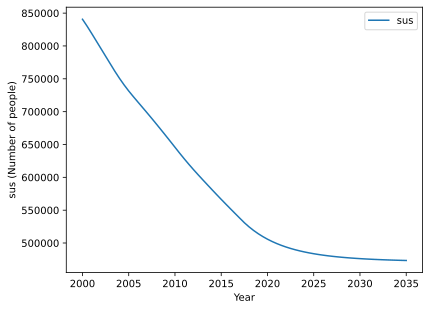

In [17]:
result.model.pops[0].comps[1].plot()

You can retrieve a specific population and object by name rather than by index

In [18]:
result.model.get_pop('0-4').get_comp('sus')

Compartment "sus" ('0-4', 'sus')

Methods `get_comp`, `get_par`, `get_charac` and `get_links` exist to retrieve variables of a specific type. If you have a code name but don't know the type of variable, you can use the generic `get_variable` method. This method returns a list of matching objects (because if the code name corresponds to a link, there could be more than one matching object)

In [19]:
result.model.get_pop('0-4').get_variable('sus')

[Compartment "sus" ('0-4', 'sus')]

The `get_variable` method also supports the standard link syntax `source:destination:par_name` e.g.

In [20]:
result.model.get_pop('0-4').get_variable(':ddis')

[Link pd_sad_div:flow (parameter pd_sad_div) - spdtoj to ddis,
 Link nd_sad_div:flow (parameter nd_sad_div) - sndtoj to ddis,
 Link pm_sad_div:flow (parameter pm_sad_div) - spmtoj to ddis,
 Link nm_sad_div:flow (parameter nm_sad_div) - snmtoj to ddis,
 Link px_sad_div:flow (parameter px_sad_div) - spxtoj to ddis,
 Link nx_sad_div:flow (parameter nx_sad_div) - snxtoj to ddis,
 Link pd_term:flow (parameter pd_term) - spdu to ddis,
 Link pd_term:flow (parameter pd_term) - spdd to ddis,
 Link pm_term:flow (parameter pm_term) - spmu to ddis,
 Link pm_term:flow (parameter pm_term) - spmd to ddis,
 Link px_term:flow (parameter px_term) - spxu to ddis,
 Link px_term:flow (parameter px_term) - spxd to ddis,
 Link nd_term:flow (parameter nd_term) - sndu to ddis,
 Link nd_term:flow (parameter nd_term) - sndd to ddis,
 Link nm_term:flow (parameter nm_term) - snmu to ddis,
 Link nm_term:flow (parameter nm_term) - snmd to ddis,
 Link nx_term:flow (parameter nx_term) - snxu to ddis,
 Link nx_term:flo

For convenience, the `Result` object has a `get_variable` method that wraps accessing `get_pop` and `get_variable` for the underlying `Model` object. So for example, the most convenient way of looking up a particular quantity is with:

In [21]:
result.get_variable('sus','0-4')

[Compartment "sus" ('0-4', 'sus')]

The population name is optional in `Result.get_variable` - if you omit it, it will return a list of all matching variables in all populations. This can be useful if there are multiple population types, and you don't know which populations contain a particular variable.

In [22]:
result.get_variable('sus')

[Compartment "sus" ('0-4', 'sus'),
 Compartment "sus" ('5-14', 'sus'),
 Compartment "sus" ('15-64', 'sus'),
 Compartment "sus" ('65+', 'sus'),
 Compartment "sus" ('Prisoners', 'sus')]

### Traversing the graph

The integration objects (such as `Compartment`, `Parameter` etc.) are very powerful because they store information about the relationship between quantities in the computational graph, which is not present if simply working with the values. These relationships are discussed in detail in the documentation of the model internals, but the most useful quantities are

- `Compartment.inlinks` - All links flowing into the compartment
- `Compartment.outlink` - All links flowing out of a compartment
- `Link.source` - The source compartment for the link
- `Link.dest` - The destination compartment for the link
- `Link.parameter` - The parameter supplying values for the transition
- `Parameter.links` - All of the links associated with the the parameter
- `Parameter.deps` - A dict with all of the parameter's dependencies required to evaluate its function
- `Characteristic.includes` - All of the included compartments in a characteristic
- `Characteristic.denominator` - The denominator compartment or characteristic

For example

In [23]:
comp = result.get_variable('sus','0-4')[0]
comp

Compartment "sus" ('0-4', 'sus')

In [24]:
comp.outlinks

[Link doth_rate:flow (parameter doth_rate) - sus to doth,
 Link e_rate:flow (parameter e_rate) - sus to emi,
 Link v_num:flow (parameter v_num) - sus to vac,
 Link l_inf:flow (parameter l_inf) - sus to lteu,
 Link age_0-4_to_5-14:flow (parameter age_0-4_to_5-14) - sus to sus]

Crucially, _all of these variables are references to other objects_. Therefore, it's possible to chain the lookups together. For example, if we wanted to access the parameter governing the flow from `sus` to `vac` out of the `sus` compartment, we could use

In [25]:
link = comp.outlinks[0] # Get a link flowing out of the `sus` compartment
par = link.parameter # Get the parameter associated with that link
par

Parameter "doth_rate" ('0-4', 'doth_rate')

This functionality can be extremely useful in exploratory analysis because it makes it easy to trace through different parts of the model.